In [24]:
import pandas as pd

# prepare target_based data

In [25]:
target_data = pd.read_csv('./data/hitdexter3_data/data_target-based.csv', header=None)
target_data.head()

,0,1,2
0,BrC(Br)C(Br)Br,0.0,19
1,Brc1c(OCCCn2ccnc2)ccc2ccccc12,0.0,1
2,Brc1cc2c(cc1CN1CCN(c3ccccn3)CC1)OCCO2,0.0,2
3,Brc1ccc(-c2cc(-c3ccc4ccccc4c3)nc(-c3ccc4ccccc4...,0.0,1
4,Brc1ccc(-c2cc(-c3ccccc3)nc(NCc3ccccc3)n2)cc1,0.0,1


In [26]:
target_data.shape

(1489043, 3)

In [27]:
print("Counts of each value in column 1:")
print(target_data[1].value_counts())

Counts of each value in column 1:
1
0.0     1293195
1.0      109170
2.0       38042
3.0       17490
4.0       10056
         ...   
54.0          2
75.0          2
63.0          2
76.0          1
60.0          1
Name: count, Length: 65, dtype: int64


In [28]:
(target_data[2] > 100).sum()

np.int64(332653)

In [29]:
print("\nValue counts for column 2:")
print(target_data[2].value_counts())



Value counts for column 2:
2
1      441384
2      311549
3       65004
4       46978
5       38321
        ...  
256         4
254         4
255         3
257         1
260         1
Name: count, Length: 258, dtype: int64


In [30]:
target_data.columns = ['smiles', 'active', 'tested']



In [31]:
target_data.head()

,smiles,active,tested
0,BrC(Br)C(Br)Br,0.0,19
1,Brc1c(OCCCn2ccnc2)ccc2ccccc12,0.0,1
2,Brc1cc2c(cc1CN1CCN(c3ccccn3)CC1)OCCO2,0.0,2
3,Brc1ccc(-c2cc(-c3ccc4ccccc4c3)nc(-c3ccc4ccccc4...,0.0,1
4,Brc1ccc(-c2cc(-c3ccccc3)nc(NCc3ccccc3)n2)cc1,0.0,1


In [38]:
target_data['ATR'] = target_data['active'] / target_data['tested']

In [42]:
print("ATR statistics:")
print(target_data['ATR'].describe())
print("\nATR value counts:")


ATR statistics:
count    1.489043e+06
mean     6.602098e-03
std      5.930869e-02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.000000e+00
Name: ATR, dtype: float64

ATR value counts:


In [43]:
target_data.head()

,smiles,active,tested,ATR
0,BrC(Br)C(Br)Br,0.0,19,0.0
1,Brc1c(OCCCn2ccnc2)ccc2ccccc12,0.0,1,0.0
2,Brc1cc2c(cc1CN1CCN(c3ccccn3)CC1)OCCO2,0.0,2,0.0
3,Brc1ccc(-c2cc(-c3ccc4ccccc4c3)nc(-c3ccc4ccccc4...,0.0,1,0.0
4,Brc1ccc(-c2cc(-c3ccccc3)nc(NCc3ccccc3)n2)cc1,0.0,1,0.0


In [44]:
num_atr_zero = (target_data['ATR'] == 0).sum()
perc_atr_zero = num_atr_zero / len(target_data) * 100
print(f"Number of compounds with ATR of 0: {num_atr_zero}")
print(f"Percentage of compounds with ATR of 0: {perc_atr_zero:.2f}%")


Number of compounds with ATR of 0: 1293195
Percentage of compounds with ATR of 0: 86.85%


In [46]:
target_data_tested100plus = target_data[target_data['tested'] > 100]
target_data_tested100plus.shape

(332653, 4)

In [47]:
num_atr_zero = (target_data_tested100plus['ATR'] == 0).sum()
perc_atr_zero = num_atr_zero / len(target_data_tested100plus) * 100
print(f"Number of compounds with ATR of 0: {num_atr_zero}")
print(f"Percentage of compounds with ATR of 0: {perc_atr_zero:.2f}%")

Number of compounds with ATR of 0: 171182
Percentage of compounds with ATR of 0: 51.46%


In [48]:
print("ATR statistics:")
print(target_data_tested100plus['ATR'].describe())
print("\nATR value counts:")

ATR statistics:
count    332653.000000
mean          0.006725
std           0.015451
min           0.000000
25%           0.000000
50%           0.000000
75%           0.007752
max           0.439024
Name: ATR, dtype: float64

ATR value counts:


In [49]:
def label_atr(atr):
    if atr < 0.007:
        return 'NPROM'
    elif atr > 0.053:
        return 'HPROM'
    elif atr > 0.022:
        return 'PROM'
    else:
        return None

target_data_tested100plus['ATR_label'] = target_data_tested100plus['ATR'].apply(label_atr)


/tmp/ipykernel_3340412/3422154696.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_data_tested100plus['ATR_label'] = target_data_tested100plus['ATR'].apply(label_atr)


In [50]:
target_data_tested100plus.ATR_label.value_counts()

ATR_label
NPROM    245253
PROM      17525
HPROM      5227
Name: count, dtype: int64

In [51]:
num_none_atr_label = target_data_tested100plus['ATR_label'].isna().sum()
print(f"Number of compounds with ATR_label as None: {num_none_atr_label}")


Number of compounds with ATR_label as None: 64648


In [52]:
target_data_tested100plus = target_data_tested100plus[target_data_tested100plus['ATR_label'].notna()]
target_data_tested100plus.shape

(268005, 5)

In [53]:
target_data_tested100plus.head()

,smiles,active,tested,ATR,ATR_label
9,Brc1ccc(-c2nn3c(-c4ccco4)nnc3s2)o1,17.0,218,0.077982,HPROM
11,Brc1ccc(-c2nnc(-c3cccc(Br)c3)o2)cc1,1.0,210,0.004762,NPROM
22,Brc1ccc(N=NC(=NNc2nn[nH]n2)c2ccccc2)cc1,20.0,192,0.104167,HPROM
34,Brc1cccc(-c2nnc3n2CCC3)c1,0.0,239,0.000000,NPROM
41,Brc1cnc(N2CCCC2)nc1N1CCOCC1,1.0,231,0.004329,NPROM


In [60]:
target_data_tested100plus = target_data_tested100plus.reset_index(drop=True)
target_data_tested100plus['id'] = target_data_tested100plus.index + 1

# Move 'id' to the second column
cols = list(target_data_tested100plus.columns)
# Remove 'id' and insert it after the first column
cols.remove('id')
cols.insert(1, 'id')
target_data_tested100plus = target_data_tested100plus[cols]


In [61]:
target_data_tested100plus.to_csv('data/hitdexter3_data/data_target-based_tested100plus.csv', index=False)

In [67]:
# mmpdb can not handle the class label, so change class label to 0, 1, 2
target_data_tested100plus['ATR_label_num'] = target_data_tested100plus['ATR_label'].map({'NPROM': 0, 'PROM': 1, 'HPROM': 2})
target_data_tested100plus[['id', 'ATR_label_num']].to_csv('data/hitdexter3_data/data_target_data_tested100plus_id_label.txt', sep='\t', index=False)

# generate MMP database

In [57]:
! mmpdb help-smiles-format

This explains how the `--delimiter` and `--has-header` options of the `mmpdb
fragment` command affect SMILES parsing.

The mmpdb program supports the most common variants of a SMILES file. Every
SMILES file stores line-oriented records, with the SMILES in the first field
and the id (also called the title) in the second field. However, there are
differences in how to handle the first line of the file, and in how to
distinguish which is the second field. Some people use the first line to store
a header for each column in the file.

The classic Daylight SMILES file had no header line and interprets the each
line as a SMILES string followed by a whitespace followed by the id/title. The
id is the rest of the line, which means it may include space and tabs. This is
useful if you have identifiers with a space in them, like IUPAC names or
common names like "vitamin D".

A common variant is to treat the SMILES file as a CSV file, that is, with at
least two columns separated by a space, tab, or 

In [ ]:
! mmpdb fragment data/hitdexter3_data/data_target-based_tested100plus.csv -o data/hitdexter3_data/data_target-based_tested100plus_data.fragdb --delimiter comma --has-header
# ~20mins

Preparing record 0[13:09:49] Explicit valence for atom # 10 P, 7, is greater than permitted
Preparing record 2597[13:09:50] Explicit valence for atom # 7 P, 7, is greater than permitted
Preparing record 3886[13:09:51] Explicit valence for atom # 19 P, 7, is greater than permitted
Preparing record 5187[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] DEPRECATION WARNING: please use GetValence(which=)
[13:09:51] [13:09:51] DEPRECATION WARNING: DEPRECATION WARNING: please use GetValence(which=)please use GetValence(which=)

[13:09:51] DEPRE

In [ ]:
! mmpdb index data/hitdexter3_data/data_target-based_tested100plus_data.fragdb -o data/hitdexter3_data/data_target-based_tested100plus_data.mmpdb
# ~16mins

In [ ]:
# add properties to the fragment database
! mmpdb loadprops -p data/hitdexter3_data/data_target_data_tested100plus_id_label.txt data/hitdexter3_data/data_target-based_tested100plus_data.mmpdb 
# ~8mins

Using dataset: MMPs from 'data/hitdexter3_data/data_target-based_tested100plus_data.fragdb'
Reading properties from 'data/hitdexter3_data/data_target_data_tested100plus_id_label.txt'
Read 1 properties for 268005 compounds from 'data/hitdexter3_data/data_target_data_tested100plus_id_label.txt'
18463 compounds from 'data/hitdexter3_data/data_target_data_tested100plus_id_label.txt' are not in the dataset at 'data/hitdexter3_data/data_target-based_tested100plus_data.mmpdb'
Imported 249542 'ATR_label_num' records (249542 new, 0 updated).
Number of rule statistics added: 62685168 updated: 0 deleted: 0      
Loaded all properties and re-computed all rule statistics.


# check MMP results

In [ ]:
import pandas as pd
import sqlite3

# Connect to the mmpdb database
conn = sqlite3.connect('data/hitdexter3_data/data_target-based_tested100plus_data.mmpdb')

# Get all table names
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = [row[0] for row in cursor.fetchall()]

# Read each table into a dataframe and store in a dictionary
dfs = {}
for table in tables:
    dfs[table] = pd.read_sql_query(f"SELECT * FROM {table}", conn)

# Unpack each dataframe into its own variable named df_<table>
for table, df in dfs.items():
    globals()[f"df_{table}"] = df

conn.close()
# ~5mins

In [71]:
dfs.keys()

dict_keys(['dataset', 'compound', 'property_name', 'compound_property', 'rule_smiles', 'rule', 'environment_fingerprint', 'rule_environment', 'constant_smiles', 'pair', 'rule_environment_statistics', 'sqlite_stat1'])

In [72]:
dfs['dataset']

,id,mmpdb_version,title,creation_date,fragment_options,index_options,is_symmetric,num_compounds,num_rules,num_pairs,num_rule_environments,num_rule_environment_stats
0,1,4,MMPs from 'data/hitdexter3_data/data_target-ba...,2025-09-30 13:34:33.982001,"{""max_heavies"": 100, ""max_rotatable_bonds"": 10...","{""max_variable_heavies"": 10, ""min_radius"": 0, ...",0,249542,8911116,77062878,62685168,62685168


In [114]:
dfs['rule']

,id,from_smiles_id,to_smiles_id
0,1,1,2
1,2,3,2
2,3,3,1
3,4,4,5
4,5,6,7
...,...,...,...
8911111,8911112,159080,510
8911112,8911113,159080,10458
8911113,8911114,159080,11767
8911114,8911115,159080,14040


In [115]:
# Check for duplicate 'id' in dfs['rule']
duplicate_rule_ids = dfs['rule']['id'].duplicated().sum()
print(f"Number of duplicate 'id' values in dfs['rule']: {duplicate_rule_ids}")
if duplicate_rule_ids > 0:
    print("Duplicate 'id' values found in dfs['rule']!")
else:
    print("No duplicate 'id' values in dfs['rule'].")


Number of duplicate 'id' values in dfs['rule']: 0
No duplicate 'id' values in dfs['rule'].


In [113]:
dfs['rule_smiles']

,id,smiles,num_heavies
0,1,[*:1]/C=C\C=C\N(C)C,7
1,2,[*:1]/C=C\N(C)C,5
2,3,[*:1]/C=C\C=C\C=C\N(C)C,9
3,4,[*:1]/C=C\[*:2],2
4,5,[*:1]/C=C\C=C\[*:2],4
...,...,...,...
159075,159076,[*:1]C(SC)C1CCCC1,8
159076,159077,[*:1]C1CCCCC1Cl,7
159077,159078,[*:1]CNc1nonc1C,8
159078,159079,[*:1]CCCC(=O)NCC(=O)O,10


In [73]:
dfs['compound']

,id,public_id,input_smiles,clean_smiles,clean_num_heavies
0,1,178747,COC(=O)/C(C(C)=O)=C(\C=C\C=C\N(C)C)N(C)C,COC(=O)/C(C(C)=O)=C(\C=C\C=C\N(C)C)N(C)C,19
1,2,104193,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,COC(=O)/C(C(C)=O)=C(\C=C\N(C)C)N(C)C,17
2,3,189599,COC(=O)/C(C(C)=O)=C(\C=C\C=C\C=C\N(C)C)N(C)C,COC(=O)/C(C(C)=O)=C(\C=C\C=C\C=C\N(C)C)N(C)C,21
3,4,255313,Cc1ccc(C)c(NC(=S)/C(=C(\[O-])c2ccc(OC(F)F)cc2)...,Cc1ccc(C)c(NC(=S)/C(=C(\[O-])c2ccc(OC(F)F)cc2)...,30
4,5,153066,COc1cccc(NC(=S)/C(=C(\[O-])c2ccc(OC(F)F)cc2)[n...,COc1cccc(NC(=S)/C(=C(\[O-])c2ccc(OC(F)F)cc2)[n...,30
...,...,...,...,...,...
249537,249538,206117,COc1ccc(C)cc1-n1nnnc1SCC(=O)NNC(=O)c1ccc([N+](...,COc1ccc(C)cc1-n1nnnc1SCC(=O)NNC(=O)c1ccc([N+](...,31
249538,249539,213594,O=C(CSc1nnnn1-c1ccc(Cl)cc1)NNC(=O)c1ccc([N+](=...,O=C(CSc1nnnn1-c1ccc(Cl)cc1)NNC(=O)c1ccc([N+](=...,29
249539,249540,245966,O=C(CSc1nnnn1-c1cccc2ccccc12)Nc1ccc(N2CCOCC2)c...,O=C(CSc1nnnn1-c1cccc2ccccc12)Nc1ccc(N2CCOCC2)c...,33
249540,249541,197599,O=C(CSc1nnnn1-c1ccc(O)cc1)Nc1cccc(S(=O)(=O)N2C...,O=C(CSc1nnnn1-c1ccc(O)cc1)Nc1cccc(S(=O)(=O)N2C...,31


In [74]:
dfs['property_name']

,id,name
0,0,ATR_label_num


In [75]:
dfs['compound_property']

,id,compound_id,property_name_id,value
0,1,242634,0,2.0
1,2,12719,0,0.0
2,3,243314,0,2.0
3,4,12740,0,0.0
4,5,227731,0,0.0
...,...,...,...,...
249537,249538,229652,0,0.0
249538,249539,217463,0,0.0
249539,249540,136275,0,0.0
249540,249541,136295,0,0.0


In [76]:
dfs['rule']

,id,from_smiles_id,to_smiles_id
0,1,1,2
1,2,3,2
2,3,3,1
3,4,4,5
4,5,6,7
...,...,...,...
8911111,8911112,159080,510
8911112,8911113,159080,10458
8911113,8911114,159080,11767
8911114,8911115,159080,14040


In [78]:
dfs['pair']

,id,rule_environment_id,compound1_id,compound2_id,constant_id
0,1,1,1,2,1
1,2,2,1,2,1
2,3,3,1,2,1
3,4,4,1,2,1
4,5,5,1,2,1
...,...,...,...,...,...
77062873,77062874,37157484,219672,229397,562586
77062874,77062875,62685165,219672,229397,562586
77062875,77062876,62685166,219672,229397,562586
77062876,77062877,62685167,219672,229397,562586


In [ ]:
# For each pair, get: pair id, constant smiles, compound1 smiles, compound2 smiles, value1 (property_name_id=0), value2 (property_name_id=1)

# We'll join: pair, constant_smiles, compound, compound_property

# Output as a DataFrame

query = """
SELECT
    pair.id AS pair_id,
    pair.constant_id AS constant_id,
    constant_smiles.smiles AS constant_smiles,
    pair.compound1_id AS compound1_id,
    c1.input_smiles AS compound1_smiles,
    pair.compound2_id AS compound2_id,
    c2.input_smiles AS compound2_smiles,
    pair.rule_environment_id AS rule_environment_id,
    re.rule_id,
    rs.smiles AS rule_smiles,
    rs.num_heavies AS rule_smiles_num_heavies,
    re.environment_fingerprint_id,
    re.radius,
    re.num_pairs,
    ef.smarts AS environment_fingerprint_smarts,
    ef.parent_smarts AS environment_fingerprint_parent_smarts,
    cp1.value AS value_c1,  -- property_name_id = 0
    cp2.value AS value_c2   -- property_name_id = 0

FROM pair
JOIN constant_smiles ON pair.constant_id = constant_smiles.id
LEFT JOIN compound AS c1 ON pair.compound1_id = c1.id
LEFT JOIN compound AS c2 ON pair.compound2_id = c2.id
LEFT JOIN compound_property AS cp1 ON cp1.compound_id = pair.compound1_id AND cp1.property_name_id = 0
LEFT JOIN compound_property AS cp2 ON cp2.compound_id = pair.compound2_id AND cp2.property_name_id = 0
LEFT JOIN rule_environment AS re ON pair.rule_environment_id = re.id
LEFT JOIN rule_smiles AS rs ON re.rule_id = rs.id
LEFT JOIN environment_fingerprint AS ef ON re.environment_fingerprint_id = ef.id
"""

conn = sqlite3.connect('data/hitdexter3_data/data_target-based_tested100plus_data.mmpdb')
df_pair_props = pd.read_sql_query(query, conn)
conn.close()

df_pair_props.head(20)


In [80]:
df_pair_props.to_csv('data/hitdexter3_data/data_target-based_tested100plus_pair_labels.csv', sep='\t', index=False)

In [81]:
df_pair_props.shape

(77062878, 16)

In [85]:
df_pair_props['rule_id'].nunique()

8911116

In [86]:
rule_pair_counts = df_pair_props.groupby('rule_id').size().reset_index(name='num_pairs')
rule_pair_counts.head()


,rule_id,num_pairs
0,1,12
1,2,6
2,3,6
3,4,18
4,5,12


In [91]:
(df_pair_props['num_pairs']>100).sum()

np.int64(1493526)

In [94]:
df_pair_props[df_pair_props['rule_id'] == 1].to_csv('data/hitdexter3_data/data_target_data_tested100plus_rule_1.csv', sep='\t', index=False)

First pair of molecules (including constant):


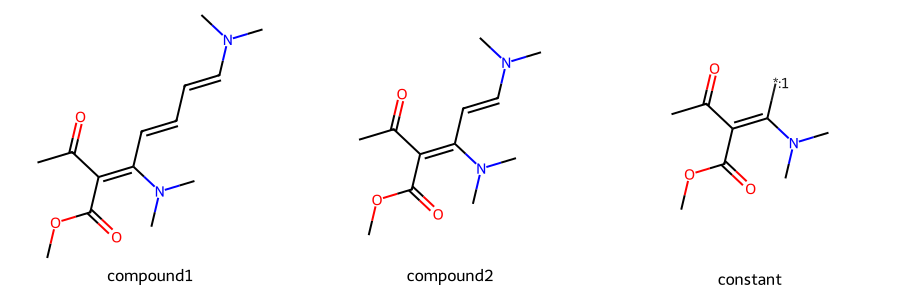

First 6 environment fingerprint smarts:


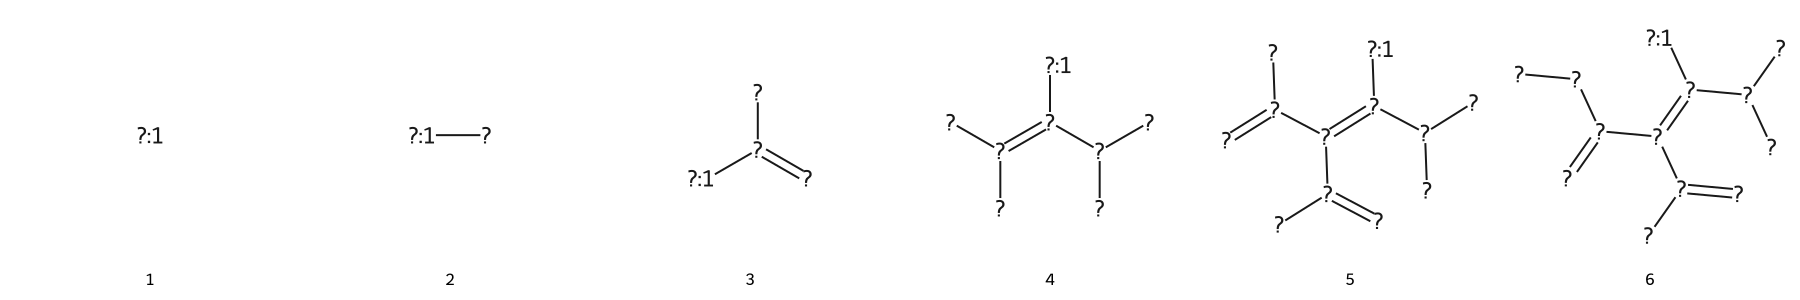

6 environment fingerprint parent smarts:


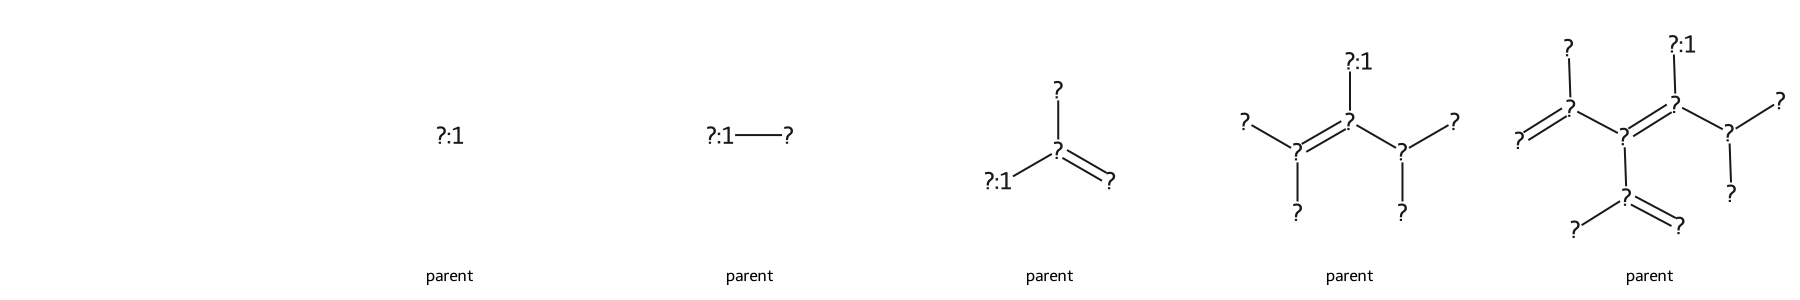

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

# Draw the first pair of molecules in the dataframe
from IPython.display import display

# Filter for rule_id == 1
rule1_df = df_pair_props[df_pair_props['rule_id'] == 1]

# Print how many different constant_id
num_constants = rule1_df['constant_id'].nunique()
print(f"Number of different constant_id for rule_id==1: {num_constants}")

# Draw the first pair: compound1, compound2, constant, aligned to core
row = rule1_df.iloc[0]
smiles1 = row['compound1_smiles']
smiles2 = row['compound2_smiles']
constant_smiles = row['constant_smiles']

mol1 = Chem.MolFromSmiles(smiles1)
mol2 = Chem.MolFromSmiles(smiles2)
mol_constant = Chem.MolFromSmiles(constant_smiles)

# Find the maximum common substructure (MCS) among the three molecules
from rdkit.Chem import rdFMCS

mols = [mol_constant, mol1, mol2]
mcs_result = rdFMCS.FindMCS(mols, completeRingsOnly=True, ringMatchesRingOnly=True, timeout=5)
mcs_smarts = mcs_result.smartsString
core = Chem.MolFromSmarts(mcs_smarts)

# Compute 2D coordinates for the core
core_for_depict = Chem.Mol(core)
Chem.rdDepictor.Compute2DCoords(core_for_depict)

# Generate 2D coordinates for each molecule using the core as template
for m in [mol_constant, mol1, mol2]:
    Chem.rdDepictor.GenerateDepictionMatching2DStructure(m, core_for_depict)

print("Drawing compound1, compound2, constant (aligned to core):")
img = Draw.MolsToGridImage(
    [mol1, mol2, mol_constant],
    molsPerRow=3,
    subImgSize=(300, 300),
    legends=["compound1", "compound2", "constant"]
)
display(img)

# Draw the rule_smiles, aligned to core if possible
rule_smiles = row['rule_smiles']
mol_rule = Chem.MolFromSmiles(rule_smiles)
if mol_rule is not None and core is not None:
    Chem.rdDepictor.GenerateDepictionMatching2DStructure(mol_rule, core_for_depict)
print("Drawing rule_smiles (aligned to core):")
img_rule = Draw.MolToImage(mol_rule, size=(300, 300), legend="rule_smiles")
display(img_rule)

# Draw the environment fingerprint, aligned to core if possible
env_fp_smarts = row['environment_fingerprint_smarts']
mol_env_fp = Chem.MolFromSmarts(env_fp_smarts) if isinstance(env_fp_smarts, str) and env_fp_smarts.strip() else None
if mol_env_fp is not None and core is not None:
    Chem.rdDepictor.GenerateDepictionMatching2DStructure(mol_env_fp, core_for_depict)
print("Drawing environment fingerprint (aligned to core):")
img_env_fp = Draw.MolToImage(mol_env_fp, size=(300, 300), legend="env_fp")
display(img_env_fp)

# Draw the environment fingerprint parent, aligned to core if possible
env_fp_parent_smarts = row['environment_fingerprint_parent_smarts']
mol_env_fp_parent = Chem.MolFromSmarts(env_fp_parent_smarts) if isinstance(env_fp_parent_smarts, str) and env_fp_parent_smarts.strip() else None
if mol_env_fp_parent is not None and core is not None:
    Chem.rdDepictor.GenerateDepictionMatching2DStructure(mol_env_fp_parent, core_for_depict)
print("Drawing environment fingerprint parent (aligned to core):")
img_env_fp_parent = Draw.MolToImage(mol_env_fp_parent, size=(300, 300), legend="env_fp_parent")
display(img_env_fp_parent)

# End